In [3]:
from pathlib import Path
from pyhdf.SD import SD, SDC
import pprint
import numpy as np
from matplotlib import pyplot as plt


In [20]:
home = Path.home()
print(home)
data_dir = home / Path("OneDrive/Documents/thesis/")
print(data_dir)



C:\Users\jesse
C:\Users\jesse\OneDrive\Documents\thesis


In [21]:
#hdf_files="MYD021KM.A2013122.1140.061.2018046032403.hdf"
hdf_files=list(data_dir.glob("MYD021KM*.hdf"))
hdf_files

[WindowsPath('C:/Users/jesse/OneDrive/Documents/thesis/MYD021KM.A2013122.1140.061.2018046032403.hdf')]

In [24]:
file_name = str(data_dir / Path(hdf_files[0]))
print(f'reading {file_name}')
the_file = SD(file_name, SDC.READ)

datasets_dict = the_file.datasets()

for idx,sds in enumerate(datasets_dict.keys()):
    print(idx,sds)

reading C:\Users\jesse\OneDrive\Documents\thesis\MYD021KM.A2013122.1140.061.2018046032403.hdf
0 Latitude
1 Longitude
2 EV_1KM_RefSB
3 EV_1KM_RefSB_Uncert_Indexes
4 EV_1KM_Emissive
5 EV_1KM_Emissive_Uncert_Indexes
6 EV_250_Aggr1km_RefSB
7 EV_250_Aggr1km_RefSB_Uncert_Indexes
8 EV_250_Aggr1km_RefSB_Samples_Used
9 EV_500_Aggr1km_RefSB
10 EV_500_Aggr1km_RefSB_Uncert_Indexes
11 EV_500_Aggr1km_RefSB_Samples_Used
12 Height
13 SensorZenith
14 SensorAzimuth
15 Range
16 SolarZenith
17 SolarAzimuth
18 gflags
19 EV_Band26
20 EV_Band26_Uncert_Indexes
21 Band_250M
22 Band_500M
23 Band_1KM_RefSB
24 Band_1KM_Emissive
25 Noise in Thermal Detectors
26 Change in relative responses of thermal detectors
27 DC Restore Change for Thermal Bands
28 DC Restore Change for Reflective 250m Bands
29 DC Restore Change for Reflective 500m Bands
30 DC Restore Change for Reflective 1km Bands


In [25]:
longwave_data = the_file.select('EV_1KM_Emissive') # select sds
print(longwave_data.info())
help(longwave_data.info)

('EV_1KM_Emissive', 3, [16, 2030, 1354], 23, 8)
Help on method info in module pyhdf.SD:

info() method of pyhdf.SD.SDS instance
    Retrieves information about the dataset.
    
    Args::
    
      no argument
    
    Returns::
    
      5-element tuple holding:
    
      - dataset name
      - dataset rank (number of dimensions)
      - dataset shape, that is a list giving the length of each
        dataset dimension; if the first dimension is unlimited, then
        the first value of the list gives the current length of the
        unlimited dimension
      - data type (one of the SDC.xxx values)
      - number of attributes defined for the dataset
    
    C library equivalent : SDgetinfo



In [26]:
# first row of the first channel and find its numpy dtype
data_row = longwave_data[0,0,:] # get sds data
print(data_row.shape,data_row.dtype)

(1354,) uint16


In [27]:
# all the rows and columns for the first channel
longwave_data[0,:,:]


array([[ 6373,  6388,  6388, ...,  6740,  6717,  6694],
       [ 6360,  6383,  6390, ...,  6749,  6734,  6718],
       [ 6327,  6372,  6395, ...,  6738,  6723,  6708],
       ...,
       [ 6549,  6736,  6781, ..., 10026, 10463, 10237],
       [ 6701,  6558,  6641, ...,  9755, 10292,  9861],
       [ 6534,  6690,  6713, ...,  9825, 10131,  9661]], dtype=uint16)

In [28]:
# attributes for EV_1KM_Emissive
pprint.pprint(longwave_data.attributes() )


{'_FillValue': 65535,
 'band_names': '20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36',
 'long_name': 'Earth View 1KM Emissive Bands Scaled Integers',
 'radiance_offsets': [2467.264404296875,
                      2480.6005859375,
                      2478.176513671875,
                      2402.468505859375,
                      1077.44482421875,
                      1560.3333740234375,
                      2724.21826171875,
                      2317.48828125,
                      2610.015380859375,
                      1560.333251953125,
                      2035.9332275390625,
                      2119.08447265625,
                      2500.599365234375,
                      2499.093505859375,
                      2500.5205078125,
                      2495.89111328125],
 'radiance_scales': [6.9307534431573e-05,
                     0.00346690253354609,
                     7.626575097674504e-05,
                     8.990753121906891e-05,
                     3.1556141

In [30]:
longwave_bands = the_file.select('Band_1KM_Emissive')
longwave_bands.attributes()


{'long_name': '1KM Emissive Band Numbers for Subsetting'}

In [31]:
band_nums=longwave_bands.get()
print(f'here are the modis channels in the emissive dataset \n{band_nums}')

here are the modis channels in the emissive dataset 
[20. 21. 22. 23. 24. 25. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.]


In [32]:
ch30_index=np.searchsorted(band_nums,30.)
print(ch30_index.dtype)
ch30_index = int(ch30_index) #(float doesn't work)
print(f'channel 30 is located at index {ch30_index}')

int64
channel 30 is located at index 9


In [34]:
#Read channel 30 at index 9 into a numpy array of type uint16
ch30_data = longwave_data[ch30_index,:,:]
print(ch30_data.shape)
print(ch30_data.dtype)

(2030, 1354)
uint16


(2030, 1354)


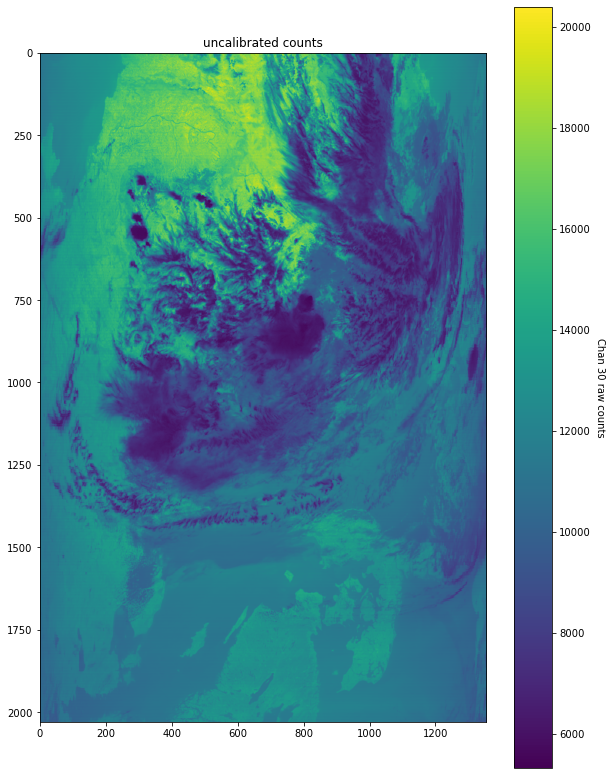

In [35]:
#Plot the channel 30 image
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch30_data)
cax=fig.colorbar(CS)
ax.set_title('uncalibrated counts')
#
# add a label to the colorbar and flip it around 270 degrees
#
out=cax.ax.set_ylabel('Chan 30 raw counts')
out.set_verticalalignment('bottom')
out.set_rotation(270)
print(ch30_data.shape)

In [36]:
scales=longwave_data.attributes()['radiance_scales']
offsets=longwave_data.attributes()['radiance_offsets']
ch30_scale=scales[ch30_index]
ch30_offset=offsets[ch30_index]
print(f'scale: {ch30_scale}, offset: {ch30_offset}')

scale: 0.0004063234373461455, offset: 1560.333251953125


In [37]:
ch30_calibrated =(ch30_data - ch30_offset)*ch30_scale

(2030, 1354)

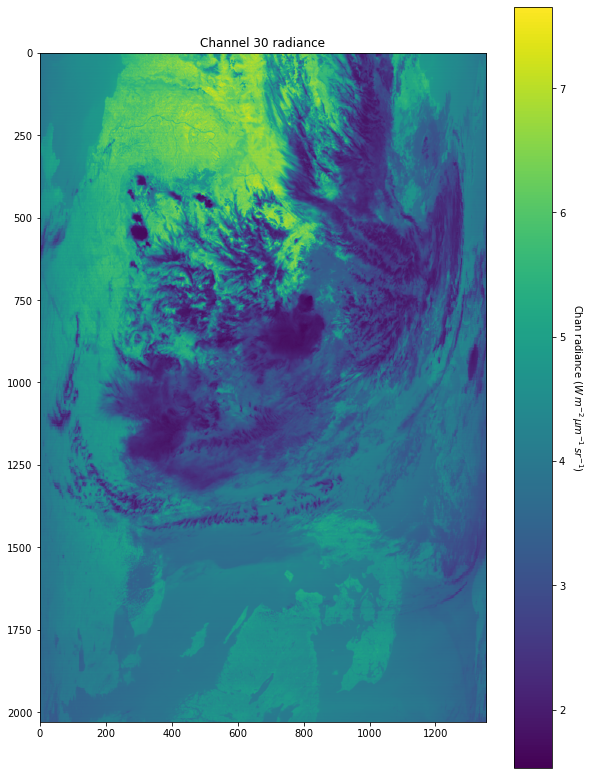

In [38]:
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch30_calibrated)
cax=fig.colorbar(CS)
ax.set_title('Channel 30 radiance')
#
# add a label to the colorbar and flip it around 270 degrees
#
out=cax.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
out.set_verticalalignment('bottom')
out.set_rotation(270)
ch30_calibrated.shape

In [39]:
# Create an HDF file 30 channel
outname="ch30_out.hdf"
sd = SD(outname, SDC.WRITE | SDC.CREATE)

# Create a dataset
sds = sd.create("ch30", SDC.FLOAT64, ch30_calibrated.shape)

# Fill the dataset with a fill value
sds.setfillvalue(0)

# Set dimension names
dim1 = sds.dim(0)
dim1.setname("row")
dim2 = sds.dim(1)
dim2.setname("col")

# Assign an attribute to the dataset
sds.units = "W/m^2/micron/sr"

# Write data
sds[:,:] = ch30_calibrated

# Close the dataset
sds.endaccess()

# Flush and close the HDF file
sd.end()